In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.fftpack
import glob,os
import gwPaPa_func as gwpapa

from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage.util.shape import view_as_windows

import tensorflow as tf
from tensorflow import keras

import pickle
from pycbc import frame,types

/home/brandon/anaconda3/envs/machlearn/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
BNS_test_path='data'
BNS_check_path='data_check'
BBH_test_path='data2'
BBH_check_test_path='data2_check'

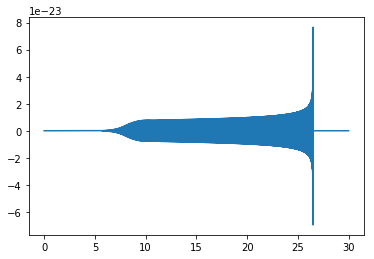

In [3]:
sample_rate=4096
t=np.arange(0,400,1/sample_rate)

try:
    d0 =np.array(frame.read_frame('data2/L-L1_STRAIN-1186741835-30.gwf','L1:STRAIN'))
    t0 = np.arange(0,len(d0)/sample_rate,1/sample_rate)
    plt.plot(t0,d0)
    plt.show()
except:
    pass

In [ ]:
num_BNS_injections=len(glob.glob('data/*.gwf'))
num_BBH_injections=len(glob.glob('data2/*.gwf'))

print(0.0,num_BNS_injections)
print(0.0,num_BBH_injections)

BNS_data=[]
BBH_data=[]
BNS_check_data=[]
BBH_check_data=[]
train_labels=[]
check_labels=[]
t0=50
tl=1

for file in glob.glob(BNS_test_path+'/*.gwf'):
    ###add np.nonzero here?
    d = np.array(frame.read_frame(file,'L1:STRAIN'))
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(1)
    
for file in glob.glob(BNS_check_path+'/*.gwf'):
    ###add np.nonzero here?
    d = np.array(frame.read_frame(file,'L1:STRAIN'))
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(1)
 
t0=7
tl=1

for file in glob.glob(BNS_test_path+'/*.gwf'):
    ###add np.nonzero here?
    d = np.array(frame.read_frame(file,'L1:STRAIN'))
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(0)
    
for file in glob.glob(BNS_check_path+'/*.gwf'):
    ###add np.nonzero here?
    d = np.array(frame.read_frame(file,'L1:STRAIN'))
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(0)



0.0 129
0.0 53


In [ ]:
print(0.0,BNS_data)
print(0.0,len(BNS_data),len(BBH_data))
print(0.0,len(BBH_data[0]),len(BBH_data[1]))
print(BBH_data[0])

In [ ]:
t=np.arange(0,len(BNS_data[0])/sample_rate,1/sample_rate)
t2=np.arange(0,len(BBH_data[0])/sample_rate,1/sample_rate)
print(0.0,max(t))
plt.plot(t,BNS_data[0])
plt.plot(t2,BBH_data[0])
plt.show()

print(BBH_data[0])

In [ ]:
class_names=["BNS","BBH"]

In [ ]:
BNS_data=np.array(BNS_data)
BBH_data=np.array(BBH_data)
BNS_check_data=np.array(BNS_check_data)
BBH_check_data=np.array(BBH_check_data)
train_labels=np.array(train_labels)
check_labels=np.array(check_labels)


train_data=np.concatenate((BNS_data,BBH_data),axis=0)
check_data=np.concatenate((BNS_check_data,BBH_check_data),axis=0)

#normalize
train_data=train_data/ np.linalg.norm(train_data)
check_data=check_data/ np.linalg.norm(check_data)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

print(model)

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model)
print(train_labels)

In [ ]:
model.fit(train_data, train_labels, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(check_data,check_labels)

print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

In [ ]:
predictions = model.predict(check_data)
print(check_data[2])

In [ ]:
print(np.nan,predictions[0],predictions[1],predictions[100])
print(np.nan,np.argmax(predictions[0]))

In [ ]:
plt.plot(check_data[0])
plt.plot(check_data[100])
plt.show()

print(np.nan,check_labels[0],check_labels[1])